In [1]:
import sys
import os

wd = os.getcwd()
sys.path.append(f'{wd}/../modules')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation

In [3]:
from spartian_tools import *

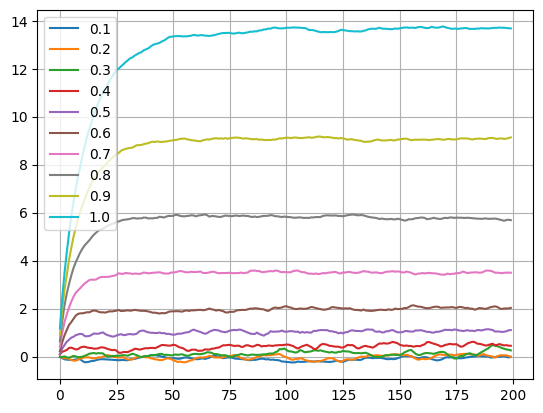

In [4]:
spartial_output_folder  = '../output_files/SPARTIAN'
rho_list = np.round(np.arange(0.1, 1.1, 0.1), 2)

mean_mu, std_mu = [], []
for rho in rho_list:
    input_folder = f'{spartial_output_folder}/SPARTIAN_LX30.0_LY10.0_LZ10.0_RHO{rho}_TEMP2.0_DT0.001'

    chemical_info = get_excess_chemical_potential_slab(input_folder, HY_size = 5, HY_zone_inf = 5, n_last_points = 50)
    
    mean_mu.append(chemical_info['mu_A']) 
    std_mu.append(chemical_info['s_A']) 

    plt.plot(chemical_info['density_integral'].integral_value, label = rho)

plt.legend()
plt.grid()

<ErrorbarContainer object of 3 artists>

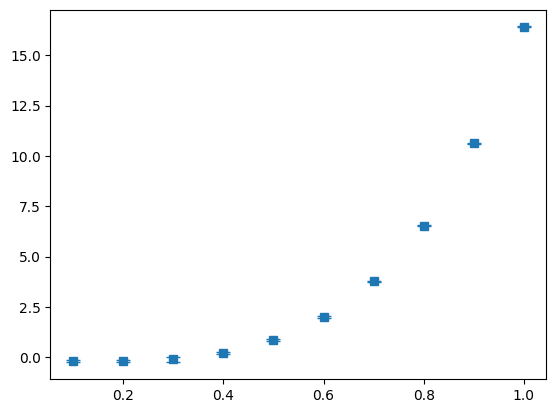

In [5]:
plt.errorbar(rho_list, mean_mu, yerr=std_mu, fmt='s', capsize=5)

In [11]:
rho = 1.0
input_folder = f'{spartial_output_folder}/SPARTIAN_LX30.0_LY10.0_LZ10.0_RHO{rho}_TEMP2.0_DT0.001'
file_density_profile = f'{input_folder}/spartian.profile_Dens_A'

dataframes_dict = get_denstiy_profile(file_density_profile)

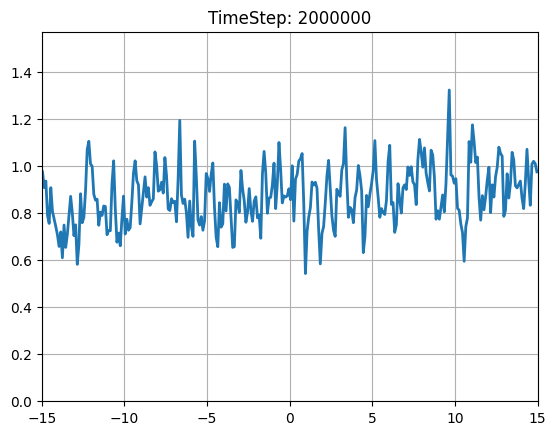

In [12]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2) 
ax.set_xlim(-15, 15) 
ax.set_ylim(0, max([df['density/number'].max() for df in dataframes_dict.values()]))
ax.grid()

def init():
    line.set_data([], [])
    return line,

def animate(i):
    timestep = list(dataframes_dict.keys())[i]
    df = dataframes_dict[timestep]
    line.set_data(df['Coord'],  df['density/number'])
    ax.set_title(f'TimeStep: {timestep}')
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=len(dataframes_dict), interval=200, blit=True)
anim.save('density_profile_movie.mp4', fps=5, extra_args=['-vcodec', 'libx264'])